# 2024 OIBC Challenge
## (Deep Learning version skeleton 02)

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import os
from datetime import datetime, timedelta
from tqdm import tqdm

### 데이터 전처리

In [ ]:
print(os.getcwd())  # 현재 작업 경로 출력

f:\For me\Project\24-OIBC-WolgoksTears\personal_files\hoon


actual_weather_1

In [36]:
# 데이터 불러오기
actual_weather_1 = pd.read_csv("../../data_files/actual_weather_1.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
actual_weather_1['datetime'] = pd.to_datetime(actual_weather_1['ts'], unit='s')
actual_weather_1['datetime'] = actual_weather_1['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열과 'location' 제거
actual_weather_1.drop(columns=['ts'], inplace=True)
actual_weather_1.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
actual_weather_1 = actual_weather_1.groupby(['datetime'], as_index=False).mean()


# weather_forecast에 없는 columns 제거
actual_weather_1.drop(columns=['real_feel_temp_shade'], inplace=True)
actual_weather_1.drop(columns=['pressure'], inplace=True)
actual_weather_1.drop(columns=['appr_temp'], inplace=True)
actual_weather_1.drop(columns=['wind_chill_temp'], inplace=True)
 
# 결과 확인
actual_weather_1.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,wet_bulb_temp,precip_1h
0,2024-03-01 00:00:00,8.500000,8.000000,81.000000,5.500000,270.000000,6.100000,17.600000,0.0,20.900000,91.000000,579.000000,7.100000,0.100000
1,2024-03-01 01:00:00,7.158333,3.041667,72.666667,2.508333,234.666667,20.483333,26.366667,0.0,20.783333,97.750000,693.416667,5.091667,0.008333
2,2024-03-01 02:00:00,6.477778,2.111111,75.666667,2.433333,262.888889,21.944444,27.433333,0.0,20.033333,86.333333,616.222222,4.733333,0.011111
3,2024-03-01 03:00:00,6.045455,0.900000,74.545455,1.663636,213.000000,22.490909,27.645455,0.0,19.900000,62.818182,8692.363636,4.209091,0.136364
4,2024-03-01 04:00:00,5.430000,-0.090000,68.100000,-0.030000,256.800000,26.140000,42.440000,0.0,23.800000,38.100000,10911.800000,3.180000,0.410000


weather_forecast

In [37]:
# 데이터 불러오기
weather_forecast_1 = pd.read_csv("../../data_files/weather_forecast_1.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
weather_forecast_1['datetime'] = pd.to_datetime(weather_forecast_1['ts'], unit='s')
weather_forecast_1['datetime'] = weather_forecast_1['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열 제거, 'base_ts' 열 제거, 'location' 제거
weather_forecast_1.drop(columns=['ts'], inplace=True)
weather_forecast_1.drop(columns=['base_ts'], inplace=True)
weather_forecast_1.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
weather_forecast_1 = weather_forecast_1.groupby(['datetime'], as_index=False).mean()


# 예보 데이터의 columns 순서를 actual_weather columns 순서와 맞추기
weather_forecast_1 = weather_forecast_1[['datetime', 'temp', 'real_feel_temp', 'rel_hum',
       'dew_point', 'wind_dir', 'wind_spd', 'wind_gust_spd', 'uv_idx', 'vis',
       'cld_cvr', 'ceiling', 'wet_bulb_temp', 'total_liq']]
weather_forecast_1['precip_1h'] = weather_forecast_1['total_liq']
weather_forecast_1.drop(columns=['total_liq'], inplace=True)  

# 결과 확인
weather_forecast_1.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,wet_bulb_temp,precip_1h
0,2024-03-02 00:00:00,1.728394,-4.320987,64.333333,-4.320987,335.555556,22.048022,50.604944,0.0,16.093400,75.555556,1700.106667,-0.555556,0.000000
1,2024-03-02 01:00:00,1.851852,-4.506173,64.333333,-4.135800,335.000000,22.048022,50.640711,0.0,15.378140,84.777778,1249.680000,-0.432099,0.056444
2,2024-03-02 02:00:00,1.790123,-5.061728,66.333333,-3.950616,334.444444,22.656000,51.481144,0.0,14.392882,89.333333,1229.360000,-0.370370,0.197556
3,2024-03-02 03:00:00,1.604940,-5.308640,67.333333,-3.888887,333.777778,23.263967,51.463267,0.0,15.195758,94.555556,1933.786667,-0.370370,0.084667
4,2024-03-02 04:00:00,1.851852,-4.876541,66.444444,-3.950616,333.888889,23.871922,50.837400,0.0,15.825200,82.555556,2600.960000,-0.308642,0.000000


elec_supply

In [38]:
# 데이터 불러오기
elec_supply = pd.read_csv("../../data_files/elec_supply.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
elec_supply['datetime'] = pd.to_datetime(elec_supply['ts'], unit='s')
elec_supply['datetime'] = elec_supply['datetime'].dt.round('h') + timedelta(hours=9)

# 1시간 단위로 그룹화하여 평균을 계산
elec_supply = elec_supply.groupby(['datetime'], as_index=False).mean()

# 결과 확인
elec_supply.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
elec_supply.head()

,datetime,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
0,2024-01-01 00:00:00,1.285000e+06,757500.000000,0.0,115593.233333,123350.666667,527166.666667,328500.000000
1,2024-01-01 01:00:00,1.238308e+06,727538.461538,0.0,68802.153846,77036.569231,510692.307692,312692.307692
2,2024-01-01 02:00:00,1.214818e+06,694090.909091,0.0,45923.181818,53740.109091,520727.272727,318545.454545
3,2024-01-01 03:00:00,1.207923e+06,672000.000000,0.0,38567.161538,46614.815385,536000.000000,291000.000000
4,2024-01-01 04:00:00,1.192364e+06,666000.000000,0.0,22849.272727,30575.990909,526363.636364,318272.727273


smp_da

In [39]:
# 데이터 불러오기
smp_da = pd.read_csv("../../data_files/smp_da.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
smp_da['datetime'] = pd.to_datetime(smp_da['ts'], unit='s') + timedelta(hours=9)

# 결과 확인
smp_da.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
smp_da.head()

,하루전가격(원/kWh),datetime
0,107.39,2024-03-01 00:00:00
1,107.39,2024-03-01 01:00:00
2,95.30,2024-03-01 02:00:00
3,87.89,2024-03-01 03:00:00
4,0.00,2024-03-01 04:00:00


smp_rt_rc

In [40]:
# 데이터 불러오기
smp_rt_rc = pd.read_csv("../../data_files/smp_rt_rc.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
smp_rt_rc['datetime'] = pd.to_datetime(smp_rt_rc['ts'], unit='s')
smp_rt_rc['datetime'] = smp_rt_rc['datetime'].dt.round('h') + timedelta(hours=9)

# 1시간 단위로 그룹화하여 평균을 계산
smp_rt_rc = smp_rt_rc.groupby(['datetime'], as_index=False).mean()

# 결과 확인
smp_rt_rc.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
smp_rt_rc.head()

,datetime,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
0,2024-03-01 00:00:00,133.125,133.125
1,2024-03-01 01:00:00,115.160,115.160
2,2024-03-01 02:00:00,92.830,92.830
3,2024-03-01 03:00:00,87.334,87.334
4,2024-03-01 04:00:00,87.260,87.260


##### X 데이터

- 제주 기상 실측 (n+1)
- 제주 전력 시장 실시간 (n-1)
- 제주 전력 시장 현황 (n-1)

In [41]:
actual_weather_1
weather_forecast_1['datetime'] += pd.Timedelta(days=1)
smp_rt_rc['datetime'] += pd.Timedelta(days=2)
elec_supply['datetime'] += pd.Timedelta(days=2)

In [42]:
dfs = [actual_weather_1, smp_rt_rc, elec_supply]

X = reduce(lambda left, right: pd.merge(left, right, on='datetime', how='outer'), dfs)

##### Y 데이터

- 하루 전 시장 전기 예측 가격(n+1)

In [43]:
Y = smp_da

### 파이토치 모델 구성

##### 하이퍼 파라미터

In [44]:
hidden_size = 16  # Hidden state size, you can choose other values too

learning_rate = 0.001
epoches= 500

##### 날짜 설정

In [89]:
target_date = {
  # 최소 2024-03-04
  "train_start_date": '2024-03-03',
  # 최대 2024-10-22
  "train_end_date": '2024-10-22',
  # 예측할 날짜
  "predict_target_date": '2024-11-06',
}

In [46]:
X = X.loc[
  (X['datetime'] > target_date['train_start_date']) &
  (X['datetime'] <= target_date['train_end_date'])
]

In [47]:
Y = Y.loc[
  (Y['datetime'] > target_date['train_start_date']) &
  (Y['datetime'] <= target_date['train_end_date'])
]

In [48]:
from datetime import datetime, timedelta

targ = datetime.strptime(target_date['train_start_date'], '%Y-%m-%d') + timedelta(hours=1)
endd = datetime.strptime(target_date['train_end_date'], '%Y-%m-%d')

print(targ, endd)

2024-03-03 01:00:00 2024-10-22 00:00:00


In [49]:
# X 데이터의 특정 시간이 누락되었기 때문에
# Y 데이터에서도 누락된 시간대를 제거한다.

while targ <= endd:
  if not len(X.loc[X['datetime'] == targ]):
    idx = Y[Y['datetime'] == targ].index
    Y.drop(idx, inplace=True)
  
  targ = targ + timedelta(hours=1)

In [50]:
len(X), len(Y)

(5592, 5592)

##### 모듈 임포트

In [51]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.preprocessing import MinMaxScaler

In [52]:
if torch.cuda.is_available():
  print(torch.cuda.get_device_name())
  print(torch.__version__)
  print(torch.version.cuda)
  x = torch.randn(1).cuda()
  print(x)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

NVIDIA GeForce GTX 1650
2.5.0+cu118
11.8
tensor([0.3554], device='cuda:0')


device(type='cuda', index=0)

##### Dataset 구성

In [53]:
class ElecDataset(Dataset):
  def __init__(self, x_data, y_data):
    scaler = MinMaxScaler()

    columns_to_scale = x_data.columns[1:]
    x_data[columns_to_scale] = scaler.fit_transform(x_data[columns_to_scale])
    
    self.x_data = x_data.fillna(0)
    self.y_data = y_data.fillna(0)

  def __getitem__(self, index):
    length = 24
    target_y = self.y_data['하루전가격(원/kWh)'].iloc[index*length:(index+1)*length].to_numpy()
    targets = self.x_data.drop(columns='datetime').iloc[index*length:(index+1)*length].to_numpy()

    return torch.from_numpy(targets), torch.from_numpy(target_y)

  def __len__(self):
    return int(len(self.y_data) / 24)

In [54]:
dataset = ElecDataset(X, Y)

In [55]:
len(dataset)

233

##### dataloader 구성

In [56]:
dataloader = DataLoader(dataset=dataset,
                        batch_size=8,
                        # 데이터의 순서가 중요해서 shuffle하면 안될 듯, 그래도 해보자
                        shuffle=True,
                        drop_last=False)

##### 모델 구성

In [65]:
class LSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(LSTMModel, self).__init__()
    self.hidden_size = hidden_size
    
    # Define the LSTM layer
    self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=1, batch_first=True, dtype=torch.float64)

    self.dropout1 = nn.Dropout(0.2)

    self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers=1, batch_first=True, dtype=torch.float64)

    self.dropout2 = nn.Dropout(0.2)

    self.lstm3 = nn.LSTM(hidden_size, hidden_size, num_layers=1, batch_first=True, dtype=torch.float64)

    self.dropout3 = nn.Dropout(0.2)

    self.lstm4 = nn.LSTM(hidden_size, hidden_size, num_layers=1, batch_first=True, dtype=torch.float64)
    
    # Define a fully connected layer to produce output of size 1
    self.fc = nn.Linear(hidden_size, output_size, dtype=torch.float64)
  
  def forward(self, x):
    # Set initial hidden and cell states to zeros
    h0_1 = torch.zeros(1, x.size(0), self.hidden_size, dtype=torch.float64).to(x.device)  # hidden state
    c0_1 = torch.zeros(1, x.size(0), self.hidden_size, dtype=torch.float64).to(x.device)  # cell state
    
    # LSTM1
    out, _ = self.lstm1(x, (h0_1, c0_1))  # out의 shape은 (batch_size, seq_length, hidden_size)입니다.
    
    out = self.dropout1(out)

    # Set initial hidden and cell states to zeros
    h0_2 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # hidden state
    c0_2 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # cell state
    
    # LSTM2
    out, _ = self.lstm2(out, (h0_2, c0_2))  # out의 shape은 (batch_size, seq_length, hidden_size)입니다.

    out = self.dropout2(out)

    # Set initial hidden and cell states to zeros
    h0_3 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # hidden state
    c0_3 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # cell state
    
    # LSTM3
    out, _ = self.lstm3(out, (h0_3, c0_3))  # out의 shape은 (batch_size, seq_length, hidden_size)입니다.

    out = self.dropout3(out)

    # Set initial hidden and cell states to zeros
    h0_4 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # hidden state
    c0_4 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # cell state
    
    # LSTM3
    out, _ = self.lstm4(out, (h0_4, c0_4))  # out의 shape은 (batch_size, seq_length, hidden_size)입니다.
    
    # 모든 타임스텝에 대해 최종 출력 처리
    out = self.fc(out[:, -1, :])  # 각 배치에 대해 마지막 타임스텝의 출력만 취함, out의 shape은 (batch_size, output_size)로 설정됩니다.
    
    return out

In [66]:
input_size = len(X.columns) - 1  # Number of input features
output_size = 24  # Single output


model = LSTMModel(input_size, hidden_size, output_size)


criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# # Example input: batch of 16 sequences, each of length 12, with 7 features per timestep
# it = iter(dataloader)
# input_tensor = next(it)[0]
# print(input_tensor)

# # Forward pass
# output = model(input_tensor)
# print(output)  # Expected output: (16, 1)

##### 학습

In [67]:
def train(model, train_loader, criterion, optimizer, num_epochs, device):
    model = model.to(device)  # Move model to GPU/CPU

    train_history = []
    
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        
        running_loss = 0.0  # To keep track of loss
        for inputs, targets in tqdm(train_loader, ncols=100):
            # Move data to the same device as the model
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            outputs = model(inputs)
            
            # print(f'input: {inputs.shape}, targets: {targets.shape}, outputs: {outputs.shape}')
            # for name, param in model.named_parameters():
            #     if param.grad is not None:
            #         print(f"{name} grad: {param.grad.norm()}")

            loss = criterion(outputs, targets)

            # Backward pass and optimization
            optimizer.zero_grad()  # Clear the gradients
            loss.backward()        # Compute gradients
            # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()        # Update model parameters

            running_loss += loss.item()
            
            # print(loss.item())

        # Print the loss after each epoch
        avg_loss = running_loss / len(train_loader)
        train_history.append(avg_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    print("Training complete.")
    return model, train_history

In [68]:
model, train_history = train(model, dataloader, criterion, optimizer, epoches, device)

100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.38it/s]


Epoch [1/500], Loss: 18436.3406


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 46.87it/s]


Epoch [2/500], Loss: 18254.0428


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 46.83it/s]


Epoch [3/500], Loss: 17782.5081


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.93it/s]


Epoch [4/500], Loss: 17766.7546


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.43it/s]


Epoch [5/500], Loss: 17562.0851


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.39it/s]


Epoch [6/500], Loss: 17448.1392


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.32it/s]


Epoch [7/500], Loss: 17244.9498


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.48it/s]


Epoch [8/500], Loss: 16949.9605


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.36it/s]


Epoch [9/500], Loss: 16772.6070


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.65it/s]


Epoch [10/500], Loss: 16615.0683


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.72it/s]


Epoch [11/500], Loss: 16608.1639


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.18it/s]


Epoch [12/500], Loss: 16501.8741


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.79it/s]


Epoch [13/500], Loss: 16193.2815


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.21it/s]


Epoch [14/500], Loss: 16266.7840


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.40it/s]


Epoch [15/500], Loss: 16037.0157


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.34it/s]


Epoch [16/500], Loss: 15821.1520


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.71it/s]


Epoch [17/500], Loss: 15684.0177


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.06it/s]


Epoch [18/500], Loss: 15826.3190


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.55it/s]


Epoch [19/500], Loss: 15793.9077


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.89it/s]


Epoch [20/500], Loss: 15618.5448


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.93it/s]


Epoch [21/500], Loss: 15392.3853


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.01it/s]


Epoch [22/500], Loss: 15194.5773


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.55it/s]


Epoch [23/500], Loss: 15275.0922


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.12it/s]


Epoch [24/500], Loss: 15115.3931


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.63it/s]


Epoch [25/500], Loss: 14875.9243


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.40it/s]


Epoch [26/500], Loss: 14963.0104


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.54it/s]


Epoch [27/500], Loss: 14757.9878


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.05it/s]


Epoch [28/500], Loss: 14703.4078


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.31it/s]


Epoch [29/500], Loss: 14493.6670


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.68it/s]


Epoch [30/500], Loss: 14401.2588


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.18it/s]


Epoch [31/500], Loss: 14319.0006


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.08it/s]


Epoch [32/500], Loss: 14177.5977


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.87it/s]


Epoch [33/500], Loss: 14228.6291


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.53it/s]


Epoch [34/500], Loss: 13973.2520


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.43it/s]


Epoch [35/500], Loss: 13925.5431


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.01it/s]


Epoch [36/500], Loss: 13952.6588


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.40it/s]


Epoch [37/500], Loss: 13803.5487


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.44it/s]


Epoch [38/500], Loss: 13558.1469


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.12it/s]


Epoch [39/500], Loss: 13477.0781


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.40it/s]


Epoch [40/500], Loss: 13369.0335


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.75it/s]


Epoch [41/500], Loss: 13293.0554


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.29it/s]


Epoch [42/500], Loss: 13283.8856


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.68it/s]


Epoch [43/500], Loss: 13136.3433


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.93it/s]


Epoch [44/500], Loss: 12923.8811


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.96it/s]


Epoch [45/500], Loss: 12816.2186


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.82it/s]


Epoch [46/500], Loss: 12777.2421


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.10it/s]


Epoch [47/500], Loss: 12848.6231


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.97it/s]


Epoch [48/500], Loss: 12593.4636


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.75it/s]


Epoch [49/500], Loss: 12386.9075


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.52it/s]


Epoch [50/500], Loss: 12329.5866


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.61it/s]


Epoch [51/500], Loss: 12412.4743


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.26it/s]


Epoch [52/500], Loss: 12209.1080


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.97it/s]


Epoch [53/500], Loss: 12027.7082


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.03it/s]


Epoch [54/500], Loss: 12147.0632


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.79it/s]


Epoch [55/500], Loss: 11864.9541


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.69it/s]


Epoch [56/500], Loss: 11825.9833


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.15it/s]


Epoch [57/500], Loss: 11578.2061


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.69it/s]


Epoch [58/500], Loss: 11512.4850


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.26it/s]


Epoch [59/500], Loss: 11466.0975


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.12it/s]


Epoch [60/500], Loss: 11506.7775


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.40it/s]


Epoch [61/500], Loss: 11403.0298


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.02it/s]


Epoch [62/500], Loss: 11201.2442


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.30it/s]


Epoch [63/500], Loss: 11237.1554


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.79it/s]


Epoch [64/500], Loss: 11051.4500


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.25it/s]


Epoch [65/500], Loss: 10873.3131


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.52it/s]


Epoch [66/500], Loss: 10854.9902


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.16it/s]


Epoch [67/500], Loss: 10789.8768


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.58it/s]


Epoch [68/500], Loss: 10750.2663


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.22it/s]


Epoch [69/500], Loss: 10796.7934


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.71it/s]


Epoch [70/500], Loss: 10601.5440


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.97it/s]


Epoch [71/500], Loss: 10425.1699


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.27it/s]


Epoch [72/500], Loss: 10472.7399


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.27it/s]


Epoch [73/500], Loss: 10298.7572


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.23it/s]


Epoch [74/500], Loss: 10193.2377


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.88it/s]


Epoch [75/500], Loss: 10115.1827


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.13it/s]


Epoch [76/500], Loss: 10101.4548


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.86it/s]


Epoch [77/500], Loss: 9928.5031


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.50it/s]


Epoch [78/500], Loss: 9824.8466


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.55it/s]


Epoch [79/500], Loss: 9858.7038


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.60it/s]


Epoch [80/500], Loss: 9706.4291


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.62it/s]


Epoch [81/500], Loss: 9704.0736


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.09it/s]


Epoch [82/500], Loss: 9427.7851


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.76it/s]


Epoch [83/500], Loss: 9487.1452


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.24it/s]


Epoch [84/500], Loss: 9493.6645


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.06it/s]


Epoch [85/500], Loss: 9235.8568


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.81it/s]


Epoch [86/500], Loss: 9231.6698


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.52it/s]


Epoch [87/500], Loss: 9294.8098


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.02it/s]


Epoch [88/500], Loss: 9111.7380


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.33it/s]


Epoch [89/500], Loss: 8925.7300


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.25it/s]


Epoch [90/500], Loss: 8970.9535


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.11it/s]


Epoch [91/500], Loss: 8987.7529


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.45it/s]


Epoch [92/500], Loss: 8902.7202


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.95it/s]


Epoch [93/500], Loss: 8835.9655


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.70it/s]


Epoch [94/500], Loss: 8748.1718


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.48it/s]


Epoch [95/500], Loss: 8612.7039


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.17it/s]


Epoch [96/500], Loss: 8462.0045


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.75it/s]


Epoch [97/500], Loss: 8383.3194


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.49it/s]


Epoch [98/500], Loss: 8369.2003


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.52it/s]


Epoch [99/500], Loss: 8253.0939


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.49it/s]


Epoch [100/500], Loss: 8338.2335


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.23it/s]


Epoch [101/500], Loss: 8219.8846


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.03it/s]


Epoch [102/500], Loss: 8015.8519


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.90it/s]


Epoch [103/500], Loss: 7983.4798


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.89it/s]


Epoch [104/500], Loss: 8014.3810


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.40it/s]


Epoch [105/500], Loss: 8007.3029


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.53it/s]


Epoch [106/500], Loss: 7923.3080


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.49it/s]


Epoch [107/500], Loss: 7812.9035


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.80it/s]


Epoch [108/500], Loss: 7702.3315


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.80it/s]


Epoch [109/500], Loss: 7666.6657


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.23it/s]


Epoch [110/500], Loss: 7549.9247


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.83it/s]


Epoch [111/500], Loss: 7485.3148


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.06it/s]


Epoch [112/500], Loss: 7454.6709


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.17it/s]


Epoch [113/500], Loss: 7347.9518


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.15it/s]


Epoch [114/500], Loss: 7392.0652


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.40it/s]


Epoch [115/500], Loss: 7284.3709


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.87it/s]


Epoch [116/500], Loss: 7303.2047


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.67it/s]


Epoch [117/500], Loss: 7243.3254


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.49it/s]


Epoch [118/500], Loss: 7198.7012


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.41it/s]


Epoch [119/500], Loss: 7047.4674


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.67it/s]


Epoch [120/500], Loss: 7008.0952


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.93it/s]


Epoch [121/500], Loss: 6774.9823


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.39it/s]


Epoch [122/500], Loss: 6790.0992


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.44it/s]


Epoch [123/500], Loss: 6800.4106


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.51it/s]


Epoch [124/500], Loss: 6703.9438


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.91it/s]


Epoch [125/500], Loss: 6595.6713


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.75it/s]


Epoch [126/500], Loss: 6617.3945


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.60it/s]


Epoch [127/500], Loss: 6629.4414


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.69it/s]


Epoch [128/500], Loss: 6543.4183


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.72it/s]


Epoch [129/500], Loss: 6376.8543


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.12it/s]


Epoch [130/500], Loss: 6263.2817


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.40it/s]


Epoch [131/500], Loss: 6416.3358


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.16it/s]


Epoch [132/500], Loss: 6350.2922


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.25it/s]


Epoch [133/500], Loss: 6156.2818


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.42it/s]


Epoch [134/500], Loss: 6148.8036


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.38it/s]


Epoch [135/500], Loss: 6146.5097


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.38it/s]


Epoch [136/500], Loss: 6029.7833


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.04it/s]


Epoch [137/500], Loss: 6041.0738


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.54it/s]


Epoch [138/500], Loss: 5916.3757


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.48it/s]


Epoch [139/500], Loss: 5845.9857


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.07it/s]


Epoch [140/500], Loss: 5862.3009


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.38it/s]


Epoch [141/500], Loss: 5815.6520


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.49it/s]


Epoch [142/500], Loss: 5725.3020


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.75it/s]


Epoch [143/500], Loss: 5670.3598


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.66it/s]


Epoch [144/500], Loss: 5591.2126


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.60it/s]


Epoch [145/500], Loss: 5636.7705


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.13it/s]


Epoch [146/500], Loss: 5415.4653


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.12it/s]


Epoch [147/500], Loss: 5504.8542


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.38it/s]


Epoch [148/500], Loss: 5412.3658


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.23it/s]


Epoch [149/500], Loss: 5532.4287


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.79it/s]


Epoch [150/500], Loss: 5329.2530


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.74it/s]


Epoch [151/500], Loss: 5304.5792


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.59it/s]


Epoch [152/500], Loss: 5348.3131


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.21it/s]


Epoch [153/500], Loss: 5230.1296


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.02it/s]


Epoch [154/500], Loss: 5185.0222


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.52it/s]


Epoch [155/500], Loss: 5142.7457


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.37it/s]


Epoch [156/500], Loss: 5200.5874


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.15it/s]


Epoch [157/500], Loss: 5020.8509


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.95it/s]


Epoch [158/500], Loss: 4892.6901


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.00it/s]


Epoch [159/500], Loss: 4887.0266


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.27it/s]


Epoch [160/500], Loss: 4843.6538


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.02it/s]


Epoch [161/500], Loss: 4813.4689


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.19it/s]


Epoch [162/500], Loss: 4871.0846


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.64it/s]


Epoch [163/500], Loss: 4830.9012


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.54it/s]


Epoch [164/500], Loss: 4733.3987


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.14it/s]


Epoch [165/500], Loss: 4756.3758


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.50it/s]


Epoch [166/500], Loss: 4582.8325


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.80it/s]


Epoch [167/500], Loss: 4597.2178


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.77it/s]


Epoch [168/500], Loss: 4479.9116


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.88it/s]


Epoch [169/500], Loss: 4529.0848


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.47it/s]


Epoch [170/500], Loss: 4444.5757


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.85it/s]


Epoch [171/500], Loss: 4483.3205


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.90it/s]


Epoch [172/500], Loss: 4378.2575


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.02it/s]


Epoch [173/500], Loss: 4385.5690


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.21it/s]


Epoch [174/500], Loss: 4269.8226


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.47it/s]


Epoch [175/500], Loss: 4306.3517


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.38it/s]


Epoch [176/500], Loss: 4212.3364


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.87it/s]


Epoch [177/500], Loss: 4240.2292


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.98it/s]


Epoch [178/500], Loss: 4127.7629


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.71it/s]


Epoch [179/500], Loss: 4168.7926


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.74it/s]


Epoch [180/500], Loss: 4113.0830


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.13it/s]


Epoch [181/500], Loss: 4073.9938


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.22it/s]


Epoch [182/500], Loss: 4054.6382


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.22it/s]


Epoch [183/500], Loss: 3936.4595


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.18it/s]


Epoch [184/500], Loss: 4057.3864


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.62it/s]


Epoch [185/500], Loss: 3977.7807


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.97it/s]


Epoch [186/500], Loss: 3898.3880


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.90it/s]


Epoch [187/500], Loss: 3920.2919


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.81it/s]


Epoch [188/500], Loss: 3829.9528


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.17it/s]


Epoch [189/500], Loss: 3831.0423


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.04it/s]


Epoch [190/500], Loss: 3778.5375


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.18it/s]


Epoch [191/500], Loss: 3691.8959


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.11it/s]


Epoch [192/500], Loss: 3619.6461


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.81it/s]


Epoch [193/500], Loss: 3662.2748


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.06it/s]


Epoch [194/500], Loss: 3699.9242


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.10it/s]


Epoch [195/500], Loss: 3535.7817


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.60it/s]


Epoch [196/500], Loss: 3528.3697


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.04it/s]


Epoch [197/500], Loss: 3475.1952


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.09it/s]


Epoch [198/500], Loss: 3458.5190


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.03it/s]


Epoch [199/500], Loss: 3408.5336


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.47it/s]


Epoch [200/500], Loss: 3486.4963


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.17it/s]


Epoch [201/500], Loss: 3385.1519


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.36it/s]


Epoch [202/500], Loss: 3351.4402


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.25it/s]


Epoch [203/500], Loss: 3302.0684


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.23it/s]


Epoch [204/500], Loss: 3263.7093


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.07it/s]


Epoch [205/500], Loss: 3304.0208


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.02it/s]


Epoch [206/500], Loss: 3270.1145


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.38it/s]


Epoch [207/500], Loss: 3330.8136


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.16it/s]


Epoch [208/500], Loss: 3209.9445


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.49it/s]


Epoch [209/500], Loss: 3130.3930


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.98it/s]


Epoch [210/500], Loss: 3241.1628


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.37it/s]


Epoch [211/500], Loss: 3160.7413


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.82it/s]


Epoch [212/500], Loss: 3157.8719


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.00it/s]


Epoch [213/500], Loss: 3073.2399


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.15it/s]


Epoch [214/500], Loss: 3006.9660


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.49it/s]


Epoch [215/500], Loss: 2975.0168


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.80it/s]


Epoch [216/500], Loss: 2968.1667


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.96it/s]


Epoch [217/500], Loss: 2925.5903


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.08it/s]


Epoch [218/500], Loss: 2894.0114


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.33it/s]


Epoch [219/500], Loss: 3035.9546


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.54it/s]


Epoch [220/500], Loss: 2847.2424


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.24it/s]


Epoch [221/500], Loss: 2899.7025


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.35it/s]


Epoch [222/500], Loss: 2892.3409


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.56it/s]


Epoch [223/500], Loss: 2797.5930


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.44it/s]


Epoch [224/500], Loss: 2775.2436


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.64it/s]


Epoch [225/500], Loss: 2881.0892


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.56it/s]


Epoch [226/500], Loss: 2745.0038


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.18it/s]


Epoch [227/500], Loss: 2694.5709


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.20it/s]


Epoch [228/500], Loss: 2803.2872


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.91it/s]


Epoch [229/500], Loss: 2726.7956


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.26it/s]


Epoch [230/500], Loss: 2636.1737


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.65it/s]


Epoch [231/500], Loss: 2643.5952


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.90it/s]


Epoch [232/500], Loss: 2585.0368


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.09it/s]


Epoch [233/500], Loss: 2702.9592


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.77it/s]


Epoch [234/500], Loss: 2552.7160


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.87it/s]


Epoch [235/500], Loss: 2679.2315


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.27it/s]


Epoch [236/500], Loss: 2538.4604


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.83it/s]


Epoch [237/500], Loss: 2673.3870


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.66it/s]


Epoch [238/500], Loss: 2582.7455


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.53it/s]


Epoch [239/500], Loss: 2445.9204


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.97it/s]


Epoch [240/500], Loss: 2487.7929


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.39it/s]


Epoch [241/500], Loss: 2443.5516


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.33it/s]


Epoch [242/500], Loss: 2479.0652


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.82it/s]


Epoch [243/500], Loss: 2443.2618


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.46it/s]


Epoch [244/500], Loss: 2415.3858


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.02it/s]


Epoch [245/500], Loss: 2386.1832


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.66it/s]


Epoch [246/500], Loss: 2350.8416


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.37it/s]


Epoch [247/500], Loss: 2343.4174


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.59it/s]


Epoch [248/500], Loss: 2320.6304


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.33it/s]


Epoch [249/500], Loss: 2315.9755


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.44it/s]


Epoch [250/500], Loss: 2276.6510


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.77it/s]


Epoch [251/500], Loss: 2259.6305


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.34it/s]


Epoch [252/500], Loss: 2277.7793


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.68it/s]


Epoch [253/500], Loss: 2251.1240


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.82it/s]


Epoch [254/500], Loss: 2232.1061


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.11it/s]


Epoch [255/500], Loss: 2264.3270


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.83it/s]


Epoch [256/500], Loss: 2202.8828


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.02it/s]


Epoch [257/500], Loss: 2238.6963


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.12it/s]


Epoch [258/500], Loss: 2340.4022


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.83it/s]


Epoch [259/500], Loss: 2178.0597


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.15it/s]


Epoch [260/500], Loss: 2321.1208


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.21it/s]


Epoch [261/500], Loss: 2129.0310


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.22it/s]


Epoch [262/500], Loss: 2127.8773


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.68it/s]


Epoch [263/500], Loss: 2124.9327


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.34it/s]


Epoch [264/500], Loss: 2138.5664


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.62it/s]


Epoch [265/500], Loss: 2110.6372


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.49it/s]


Epoch [266/500], Loss: 2086.4012


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.69it/s]


Epoch [267/500], Loss: 2070.1671


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.43it/s]


Epoch [268/500], Loss: 2077.3068


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.93it/s]


Epoch [269/500], Loss: 2217.1902


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.69it/s]


Epoch [270/500], Loss: 2058.9732


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.21it/s]


Epoch [271/500], Loss: 2048.4190


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.04it/s]


Epoch [272/500], Loss: 1998.3857


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.35it/s]


Epoch [273/500], Loss: 1991.4975


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.30it/s]


Epoch [274/500], Loss: 2018.7858


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.29it/s]


Epoch [275/500], Loss: 1981.2885


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.33it/s]


Epoch [276/500], Loss: 1973.2471


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.12it/s]


Epoch [277/500], Loss: 1945.7460


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.00it/s]


Epoch [278/500], Loss: 1968.9349


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.51it/s]


Epoch [279/500], Loss: 2001.7075


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.88it/s]


Epoch [280/500], Loss: 2124.5060


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.14it/s]


Epoch [281/500], Loss: 1921.0021


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.00it/s]


Epoch [282/500], Loss: 2034.9824


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.54it/s]


Epoch [283/500], Loss: 1911.3706


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.12it/s]


Epoch [284/500], Loss: 1928.8933


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.35it/s]


Epoch [285/500], Loss: 1881.8468


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.57it/s]


Epoch [286/500], Loss: 1875.1675


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.50it/s]


Epoch [287/500], Loss: 1883.5406


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.66it/s]


Epoch [288/500], Loss: 1902.5039


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.69it/s]


Epoch [289/500], Loss: 1845.5374


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.95it/s]


Epoch [290/500], Loss: 1858.1534


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.91it/s]


Epoch [291/500], Loss: 1837.2883


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.36it/s]


Epoch [292/500], Loss: 1827.5564


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.32it/s]


Epoch [293/500], Loss: 1831.8370


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.17it/s]


Epoch [294/500], Loss: 1814.2152


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.32it/s]


Epoch [295/500], Loss: 1810.1772


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.88it/s]


Epoch [296/500], Loss: 1842.2841


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.38it/s]


Epoch [297/500], Loss: 1795.2043


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.87it/s]


Epoch [298/500], Loss: 1790.0358


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.56it/s]


Epoch [299/500], Loss: 1793.3629


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.31it/s]


Epoch [300/500], Loss: 1776.3471


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.31it/s]


Epoch [301/500], Loss: 1784.4767


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.53it/s]


Epoch [302/500], Loss: 1949.5499


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.61it/s]


Epoch [303/500], Loss: 1929.9697


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.16it/s]


Epoch [304/500], Loss: 1753.8551


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.62it/s]


Epoch [305/500], Loss: 1918.5171


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.57it/s]


Epoch [306/500], Loss: 1750.3717


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.50it/s]


Epoch [307/500], Loss: 1755.3247


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.32it/s]


Epoch [308/500], Loss: 1749.3441


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.08it/s]


Epoch [309/500], Loss: 1753.8048


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.62it/s]


Epoch [310/500], Loss: 1763.1634


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.89it/s]


Epoch [311/500], Loss: 1725.4366


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.73it/s]


Epoch [312/500], Loss: 1721.6587


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.10it/s]


Epoch [313/500], Loss: 1732.6792


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.16it/s]


Epoch [314/500], Loss: 1710.3649


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.56it/s]


Epoch [315/500], Loss: 1737.7612


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.17it/s]


Epoch [316/500], Loss: 1886.8668


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.57it/s]


Epoch [317/500], Loss: 1778.8025


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.41it/s]


Epoch [318/500], Loss: 1698.7105


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.28it/s]


Epoch [319/500], Loss: 1709.3837


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.11it/s]


Epoch [320/500], Loss: 1693.2763


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.85it/s]


Epoch [321/500], Loss: 1688.2071


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.03it/s]


Epoch [322/500], Loss: 1898.5612


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.51it/s]


Epoch [323/500], Loss: 1940.8371


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.58it/s]


Epoch [324/500], Loss: 1849.8241


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.35it/s]


Epoch [325/500], Loss: 1681.9841


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.04it/s]


Epoch [326/500], Loss: 1673.2893


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.61it/s]


Epoch [327/500], Loss: 1670.2780


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.20it/s]


Epoch [328/500], Loss: 1672.5384


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.00it/s]


Epoch [329/500], Loss: 1689.6389


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.19it/s]


Epoch [330/500], Loss: 1682.5677


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.94it/s]


Epoch [331/500], Loss: 1654.0542


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.49it/s]


Epoch [332/500], Loss: 1663.9910


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.24it/s]


Epoch [333/500], Loss: 1664.1680


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.07it/s]


Epoch [334/500], Loss: 1676.3382


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.81it/s]


Epoch [335/500], Loss: 1652.1525


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.58it/s]


Epoch [336/500], Loss: 1790.8394


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.01it/s]


Epoch [337/500], Loss: 1653.2451


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.49it/s]


Epoch [338/500], Loss: 1647.6966


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.34it/s]


Epoch [339/500], Loss: 1656.2320


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.65it/s]


Epoch [340/500], Loss: 1653.7581


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.59it/s]


Epoch [341/500], Loss: 1646.5888


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.78it/s]


Epoch [342/500], Loss: 1634.2056


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.31it/s]


Epoch [343/500], Loss: 1710.0670


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.40it/s]


Epoch [344/500], Loss: 1807.9531


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.44it/s]


Epoch [345/500], Loss: 1628.2539


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.58it/s]


Epoch [346/500], Loss: 1810.1593


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.39it/s]


Epoch [347/500], Loss: 1636.1919


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.03it/s]


Epoch [348/500], Loss: 1624.0477


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.51it/s]


Epoch [349/500], Loss: 1623.3332


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.24it/s]


Epoch [350/500], Loss: 1619.7938


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.97it/s]


Epoch [351/500], Loss: 1748.5982


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.72it/s]


Epoch [352/500], Loss: 1634.3735


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.92it/s]


Epoch [353/500], Loss: 1630.3212


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.83it/s]


Epoch [354/500], Loss: 1626.9493


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.51it/s]


Epoch [355/500], Loss: 1619.8684


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.57it/s]


Epoch [356/500], Loss: 1623.1377


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.38it/s]


Epoch [357/500], Loss: 1646.5164


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.04it/s]


Epoch [358/500], Loss: 1620.7906


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.98it/s]


Epoch [359/500], Loss: 1800.4495


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.88it/s]


Epoch [360/500], Loss: 1689.5243


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.99it/s]


Epoch [361/500], Loss: 1609.7281


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.19it/s]


Epoch [362/500], Loss: 1684.7167


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.99it/s]


Epoch [363/500], Loss: 1609.7410


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 46.40it/s]


Epoch [364/500], Loss: 1608.3885


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.53it/s]


Epoch [365/500], Loss: 1621.0406


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.23it/s]


Epoch [366/500], Loss: 1612.5275


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.99it/s]


Epoch [367/500], Loss: 1604.5088


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.03it/s]


Epoch [368/500], Loss: 1794.0321


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.62it/s]


Epoch [369/500], Loss: 1604.2812


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.16it/s]


Epoch [370/500], Loss: 1604.8396


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.51it/s]


Epoch [371/500], Loss: 1606.6074


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.13it/s]


Epoch [372/500], Loss: 1636.9576


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.08it/s]


Epoch [373/500], Loss: 1604.0636


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.30it/s]


Epoch [374/500], Loss: 1606.0739


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.60it/s]


Epoch [375/500], Loss: 1598.6080


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.89it/s]


Epoch [376/500], Loss: 1882.6558


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.64it/s]


Epoch [377/500], Loss: 1602.7525


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.87it/s]


Epoch [378/500], Loss: 1598.7238


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.35it/s]


Epoch [379/500], Loss: 1917.6988


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.39it/s]


Epoch [380/500], Loss: 1609.4758


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.52it/s]


Epoch [381/500], Loss: 1618.8586


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.91it/s]


Epoch [382/500], Loss: 1607.1825


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.77it/s]


Epoch [383/500], Loss: 1630.6862


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.99it/s]


Epoch [384/500], Loss: 1593.1399


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.62it/s]


Epoch [385/500], Loss: 1619.4205


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.56it/s]


Epoch [386/500], Loss: 1596.4620


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.04it/s]


Epoch [387/500], Loss: 1623.3137


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.90it/s]


Epoch [388/500], Loss: 1603.1535


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.94it/s]


Epoch [389/500], Loss: 1601.6705


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.87it/s]


Epoch [390/500], Loss: 1615.4084


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.99it/s]


Epoch [391/500], Loss: 1592.6535


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.50it/s]


Epoch [392/500], Loss: 1675.3016


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.22it/s]


Epoch [393/500], Loss: 1593.4682


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.64it/s]


Epoch [394/500], Loss: 1614.3092


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.24it/s]


Epoch [395/500], Loss: 1596.0480


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.24it/s]


Epoch [396/500], Loss: 1600.0319


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.94it/s]


Epoch [397/500], Loss: 1604.1570


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.15it/s]


Epoch [398/500], Loss: 1626.1882


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.56it/s]


Epoch [399/500], Loss: 1611.7700


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.51it/s]


Epoch [400/500], Loss: 1596.6768


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.64it/s]


Epoch [401/500], Loss: 1598.3781


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.57it/s]


Epoch [402/500], Loss: 1599.1068


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.25it/s]


Epoch [403/500], Loss: 1658.8370


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.35it/s]


Epoch [404/500], Loss: 1603.2198


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.50it/s]


Epoch [405/500], Loss: 1606.9589


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 46.60it/s]


Epoch [406/500], Loss: 1608.8643


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.83it/s]


Epoch [407/500], Loss: 1592.8266


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.74it/s]


Epoch [408/500], Loss: 1592.9179


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.07it/s]


Epoch [409/500], Loss: 1612.4954


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.26it/s]


Epoch [410/500], Loss: 1608.5381


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.04it/s]


Epoch [411/500], Loss: 1613.5863


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.76it/s]


Epoch [412/500], Loss: 1631.9197


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.62it/s]


Epoch [413/500], Loss: 1587.6444


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.61it/s]


Epoch [414/500], Loss: 1605.4630


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.95it/s]


Epoch [415/500], Loss: 1786.6510


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.22it/s]


Epoch [416/500], Loss: 1657.6086


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.84it/s]


Epoch [417/500], Loss: 1596.0148


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.28it/s]


Epoch [418/500], Loss: 1610.7194


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.78it/s]


Epoch [419/500], Loss: 1726.3397


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.83it/s]


Epoch [420/500], Loss: 1777.4434


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 46.19it/s]


Epoch [421/500], Loss: 1596.0738


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.07it/s]


Epoch [422/500], Loss: 1610.7411


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.98it/s]


Epoch [423/500], Loss: 1591.9602


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.33it/s]


Epoch [424/500], Loss: 1615.3342


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.77it/s]


Epoch [425/500], Loss: 1590.2626


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.13it/s]


Epoch [426/500], Loss: 1619.8650


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.77it/s]


Epoch [427/500], Loss: 1613.3305


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.23it/s]


Epoch [428/500], Loss: 1827.6882


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.78it/s]


Epoch [429/500], Loss: 1597.5744


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.39it/s]


Epoch [430/500], Loss: 1589.5749


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.92it/s]


Epoch [431/500], Loss: 1605.4412


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.57it/s]


Epoch [432/500], Loss: 1590.2854


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.26it/s]


Epoch [433/500], Loss: 1614.7464


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.74it/s]


Epoch [434/500], Loss: 1603.0599


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.11it/s]


Epoch [435/500], Loss: 1591.9510


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.75it/s]


Epoch [436/500], Loss: 1596.8432


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.63it/s]


Epoch [437/500], Loss: 1595.5161


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.37it/s]


Epoch [438/500], Loss: 1805.6939


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.36it/s]


Epoch [439/500], Loss: 1650.8413


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.00it/s]


Epoch [440/500], Loss: 1604.1621


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.90it/s]


Epoch [441/500], Loss: 1605.7301


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.10it/s]


Epoch [442/500], Loss: 1805.5047


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.19it/s]


Epoch [443/500], Loss: 1595.3831


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.36it/s]


Epoch [444/500], Loss: 1718.3489


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.85it/s]


Epoch [445/500], Loss: 1589.2298


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.97it/s]


Epoch [446/500], Loss: 1598.0565


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.04it/s]


Epoch [447/500], Loss: 1597.3279


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.42it/s]


Epoch [448/500], Loss: 1635.4629


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.02it/s]


Epoch [449/500], Loss: 1619.8367


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.27it/s]


Epoch [450/500], Loss: 1718.2471


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.23it/s]


Epoch [451/500], Loss: 1726.2981


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.47it/s]


Epoch [452/500], Loss: 1615.6504


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.56it/s]


Epoch [453/500], Loss: 1617.7308


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.49it/s]


Epoch [454/500], Loss: 1595.5138


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.64it/s]


Epoch [455/500], Loss: 1594.2603


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.00it/s]


Epoch [456/500], Loss: 1631.4079


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.81it/s]


Epoch [457/500], Loss: 1595.0770


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.87it/s]


Epoch [458/500], Loss: 1591.5107


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.38it/s]


Epoch [459/500], Loss: 1589.6040


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.12it/s]


Epoch [460/500], Loss: 1595.1425


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.67it/s]


Epoch [461/500], Loss: 1658.0010


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.18it/s]


Epoch [462/500], Loss: 1598.4416


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.72it/s]


Epoch [463/500], Loss: 1597.0826


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.06it/s]


Epoch [464/500], Loss: 1597.7212


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.05it/s]


Epoch [465/500], Loss: 1594.0275


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.82it/s]


Epoch [466/500], Loss: 1597.8418


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.49it/s]


Epoch [467/500], Loss: 1609.5632


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.82it/s]


Epoch [468/500], Loss: 1596.9046


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.14it/s]


Epoch [469/500], Loss: 1590.8876


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.93it/s]


Epoch [470/500], Loss: 1587.8126


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.87it/s]


Epoch [471/500], Loss: 1592.2724


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.05it/s]


Epoch [472/500], Loss: 1651.1447


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.48it/s]


Epoch [473/500], Loss: 1592.1649


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.65it/s]


Epoch [474/500], Loss: 1593.8756


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.71it/s]


Epoch [475/500], Loss: 1595.3971


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.70it/s]


Epoch [476/500], Loss: 1589.0939


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.81it/s]


Epoch [477/500], Loss: 1622.1517


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.89it/s]


Epoch [478/500], Loss: 1594.0437


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.39it/s]


Epoch [479/500], Loss: 1789.9853


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.39it/s]


Epoch [480/500], Loss: 1591.9207


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.23it/s]


Epoch [481/500], Loss: 1595.2865


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.01it/s]


Epoch [482/500], Loss: 1590.0749


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.76it/s]


Epoch [483/500], Loss: 1758.7542


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.82it/s]


Epoch [484/500], Loss: 1621.9220


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.58it/s]


Epoch [485/500], Loss: 1602.6108


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.56it/s]


Epoch [486/500], Loss: 1613.4587


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.81it/s]


Epoch [487/500], Loss: 1631.4014


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.21it/s]


Epoch [488/500], Loss: 1610.0807


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.82it/s]


Epoch [489/500], Loss: 1628.3090


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.02it/s]


Epoch [490/500], Loss: 1726.8228


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.34it/s]


Epoch [491/500], Loss: 1746.1420


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.95it/s]


Epoch [492/500], Loss: 1597.4434


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.45it/s]


Epoch [493/500], Loss: 1608.1395


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.75it/s]


Epoch [494/500], Loss: 1591.5395


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.26it/s]


Epoch [495/500], Loss: 1591.4453


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.18it/s]


Epoch [496/500], Loss: 1591.0387


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.37it/s]


Epoch [497/500], Loss: 1597.3139


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.05it/s]


Epoch [498/500], Loss: 1595.0039


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.86it/s]


Epoch [499/500], Loss: 1603.4956


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.52it/s]

Epoch [500/500], Loss: 1593.7941
Training complete.


학습 loss

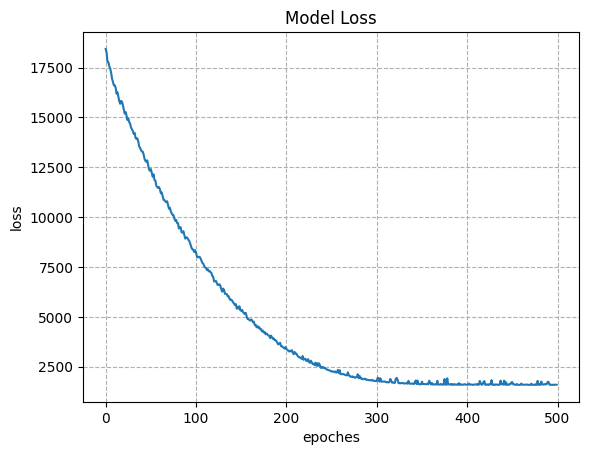

In [70]:
plt.plot(train_history)

plt.title('Model Loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.grid(True, linestyle='--')

plt.show()

In [71]:
torch.save(model.state_dict(), 'model2.pth')

##### 예측

In [72]:
model_test = LSTMModel(input_size, hidden_size, output_size)

model_test.to(device)

model_test.load_state_dict(torch.load('model2.pth'))

C:\Users\ldh75\AppData\Local\Temp\ipykernel_7604\1003502829.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_test.load_state_dict(torch.load('model2.pth'))


<All keys matched successfully>

##### X 데이터

- 제주 기상 예측 (n+1)
- 제주 전력 시장 실시간 (n-1)
- 제주 전력 시장 현황 (n-1)

In [90]:
dfs = [weather_forecast_1, smp_rt_rc, elec_supply]

input_data = reduce(lambda left, right: pd.merge(left, right, on='datetime', how='inner'), dfs)

target_day = datetime.strptime(target_date['predict_target_date'], '%Y-%m-%d')

input_data = input_data.loc[
  (input_data['datetime'] > target_day) &
  (input_data['datetime'] <= target_day + timedelta(days=1))
]

In [91]:
input_data

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,...,precip_1h,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
5889,2024-11-06 01:00:00,14.135811,10.123461,73.555556,9.506188,161.000000,30.488122,52.464633,0.000000,16.0934,...,0.0,97.400000,97.400000,1.032077e+06,497000.000000,0.000000,614.893000,908.781846,484692.307692,263769.230769
5890,2024-11-06 02:00:00,13.888900,9.814827,72.555556,9.074073,159.555556,29.862267,51.427511,0.000000,16.0934,...,0.0,87.493333,87.493333,1.032273e+06,472363.636364,0.000000,279.042545,660.190636,509636.363636,263090.909091
5891,2024-11-06 03:00:00,13.580233,9.567910,72.444444,8.827160,158.777778,28.843011,50.819533,0.000000,16.0934,...,0.0,87.232000,87.232000,1.033000e+06,455923.076923,0.000000,359.823769,739.888923,526692.307692,280307.692308
5892,2024-11-06 04:00:00,13.456778,9.444458,72.222222,8.456790,158.666667,28.431744,50.426133,0.000000,16.0934,...,0.0,87.056667,87.056667,1.033000e+06,449818.181818,0.000000,395.955182,753.233091,532909.090909,286636.363636
5893,2024-11-06 05:00:00,13.456778,9.444458,71.555556,8.395061,159.222222,27.609189,49.818156,0.000000,16.0934,...,0.0,93.358000,93.358000,1.032538e+06,456923.076923,0.000000,424.759769,579.875692,525538.461538,317230.769231
5894,2024-11-06 06:00:00,13.086411,9.444451,71.333333,8.148148,159.666667,26.983342,49.389000,0.000000,16.0934,...,0.0,103.040000,103.040000,1.033182e+06,485909.090909,0.000000,1130.962182,1256.141364,497090.909091,374727.272727
5895,2024-11-06 07:00:00,12.777778,8.888890,73.444444,8.148147,83.111111,27.805867,49.389000,0.000000,16.0934,...,0.0,108.796000,108.796000,1.068308e+06,517923.076923,817.756154,634.594462,1659.884692,500230.769231,377461.538462
5896,2024-11-06 08:00:00,13.456789,10.308654,71.000000,8.333332,84.555556,27.591289,49.192300,1.000000,16.0934,...,0.0,120.953333,120.953333,1.117000e+06,528636.363636,35087.402727,1179.212818,36390.738182,544454.545455,415727.272727
5897,2024-11-06 09:00:00,14.506167,12.407404,66.444444,8.333332,85.555556,27.394600,48.977722,2.000000,16.0934,...,0.0,136.718000,136.778000,1.204154e+06,545692.307692,126945.684615,417.556692,127487.646154,638692.307692,438461.538462
5898,2024-11-06 10:00:00,15.246933,13.580244,63.444444,8.333332,84.333333,27.394600,49.192300,2.888889,16.0934,...,0.0,145.696667,145.696667,1.278727e+06,554272.727273,205438.181818,516.134182,206078.272727,707363.636364,448181.818182


In [92]:
predict_set = ElecDataset(input_data, Y.iloc[:24])

predict_dataloader = DataLoader(dataset=predict_set,
                        batch_size=24,
                        shuffle=False)

In [93]:
model_test.eval()

with torch.no_grad():
  for inputs, _ in predict_dataloader:
    inputs = inputs.to(device)
    predictions = model_test(inputs)

print(predictions)

tensor([[128.5773, 114.5030, 110.4327, 106.6820, 107.5426, 109.5425, 119.3668,
         128.3166, 130.7978, 126.0629, 123.1386, 112.2023, 104.5492, 115.2042,
         128.6353, 133.4043, 142.1694, 147.3826, 154.1342, 155.4445, 152.9430,
         148.4650, 143.7021, 137.3979]], device='cuda:0', dtype=torch.float64)


In [94]:
flattened_list = predictions.view(-1).tolist()

print(flattened_list)

[128.57733871212656, 114.5030070947162, 110.43265479228627, 106.68203724339068, 107.5425576088741, 109.5425357372767, 119.36679343932794, 128.31659831828816, 130.79781829305006, 126.06288531852435, 123.13863590878594, 112.20231381318096, 104.54915456683813, 115.20423732316799, 128.63529635325494, 133.40428222832375, 142.16940317030466, 147.38261553387997, 154.13417329697555, 155.44449732059468, 152.94298308112073, 148.4649637217057, 143.70207379031876, 137.39791161425106]


##### 분석

예측결과

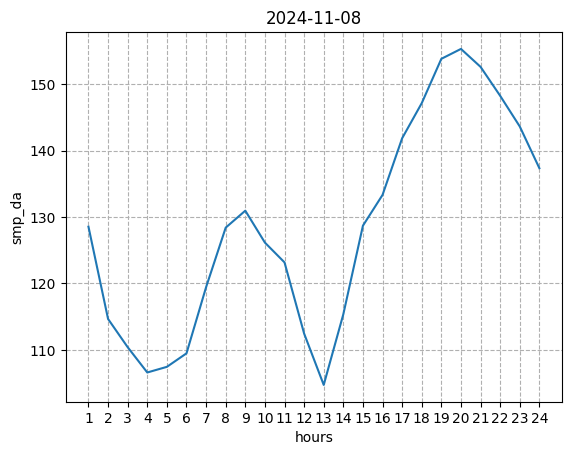

In [34]:
plt.plot(list(range(1, 25)), flattened_list)

plt.title(target_date['predict_target_date'])
plt.xlabel('hours')
plt.ylabel('smp_da')
plt.xticks(list(range(1,25, 1)))
plt.grid(True, linestyle='--')

plt.show()